### Packges to install

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.model_selection import GridSearchCV

###  Data Cleaning and exploration

In [3]:
#### Read dataset into dataframe
work = pd.read_csv('data/WFH_WFO_dataset.csv')
work.head()

,ID,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
1,2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
2,3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
3,4,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
4,5,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1


In [4]:
work.columns

Index(['ID', 'Name', 'Age', 'Occupation', 'Gender',
       'Same_ofiice_home_location', 'kids', 'RM_save_money', 'RM_quality_time',
       'RM_better_sleep', 'calmer_stressed', 'RM_professional_growth',
       'RM_lazy', 'RM_productive', 'digital_connect_sufficient',
       'RM_better_work_life_balance', 'RM_improved_skillset',
       'RM_job_opportunities', 'Target'],
      dtype='object')

In [5]:
#work.info()
print(work.info())
print(work.isnull().sum())

# Text Category Columns
cols_y_n = ['Occupation', 'Gender',
       'Same_ofiice_home_location', 'kids', 'RM_save_money', 'RM_quality_time',
       'RM_better_sleep', 'calmer_stressed', 'RM_professional_growth',
       'RM_lazy', 'RM_productive', 'digital_connect_sufficient',
       'RM_better_work_life_balance', 'RM_improved_skillset',
       'RM_job_opportunities']
for col in cols_y_n:
    print('Categories of ',col,':',work[col].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           207 non-null    int64 
 1   Name                         207 non-null    object
 2   Age                          207 non-null    int64 
 3   Occupation                   207 non-null    object
 4   Gender                       207 non-null    object
 5   Same_ofiice_home_location    207 non-null    object
 6   kids                         207 non-null    object
 7   RM_save_money                207 non-null    object
 8   RM_quality_time              207 non-null    object
 9   RM_better_sleep              207 non-null    object
 10  calmer_stressed              207 non-null    object
 11  RM_professional_growth       207 non-null    int64 
 12  RM_lazy                      207 non-null    int64 
 13  RM_productive                207 no

#### Action Items for Cleaning

* Same Office Home Location : ['Yes','No'] : Needs cleaning replace 'yes'

#### Numerical Values for Y/N Columns 
* Same_ofiice_home_location : ['Yes' 'No' 'yes']
* kids : ['Yes' 'No']
* RM_save_money : ['Yes' 'No']
* RM_quality_time : ['Yes' 'No']
* RM_better_sleep : ['Yes' 'No']
* digital_connect_sufficient : ['Yes' 'No']
* RM_job_opportunities : ['Yes' 'No' 'Not sure']

#### Columns that need encoding 

* Occupation : ['Tutor' 'HR' 'Engineer' 'Recruiter' 'Business' 'Marketing ' 'Manager']
* Gender : ['Female' 'Male']
* calmer_stressed : ['CALMER' 'STRESSED']

#### Columns that need standardizing/scaling

* Age
* RM_professional_growth : [5 2 3 4 1]
* RM_lazy : [1 2 3 4 5]
* RM_productive : [5 2 4 3 1]
* RM_better_work_life_balance : [5 3 4 2 1]
* RM_improved_skillset : [5 3 2 4 1]


In [6]:
# Data Cleaning 
work.loc[work.Same_ofiice_home_location == 'yes', 'Same_ofiice_home_location'] = 'Yes'                                        
work.Same_ofiice_home_location.unique()

work_labled = work.copy()

# Assigining 1 to Yes and 0 to No for Y/N columns 
cols_y_n = ['Same_ofiice_home_location', 'kids', 'RM_save_money', 'RM_quality_time',
       'RM_better_sleep', 'digital_connect_sufficient']

for col in cols_y_n:
    work_labled.loc[work_labled[col] == 'Yes', col] = 1
    work_labled.loc[work_labled[col] == 'No', col] = 0
    work_labled= work_labled.astype({col: int})
    
    
# Handling three categories for RM_job_opportunities
work_labled.loc[work_labled['RM_job_opportunities'] == 'Yes', 'RM_job_opportunities'] = 1
work_labled.loc[work_labled['RM_job_opportunities'] == 'No', 'RM_job_opportunities'] = -1
work_labled.loc[work_labled['RM_job_opportunities'] == 'Not sure','RM_job_opportunities'] = 0
work_labled= work_labled.astype({'RM_job_opportunities': int})
     
work_labled.head()
work_labled.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           207 non-null    int64 
 1   Name                         207 non-null    object
 2   Age                          207 non-null    int64 
 3   Occupation                   207 non-null    object
 4   Gender                       207 non-null    object
 5   Same_ofiice_home_location    207 non-null    int32 
 6   kids                         207 non-null    int32 
 7   RM_save_money                207 non-null    int32 
 8   RM_quality_time              207 non-null    int32 
 9   RM_better_sleep              207 non-null    int32 
 10  calmer_stressed              207 non-null    object
 11  RM_professional_growth       207 non-null    int64 
 12  RM_lazy                      207 non-null    int64 
 13  RM_productive                207 no

### Visualization

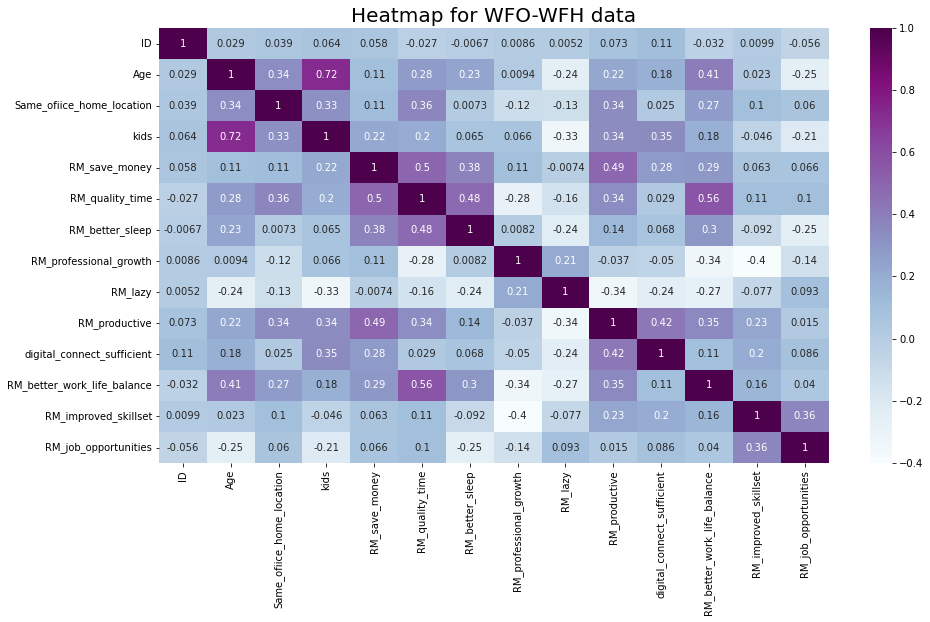

In [7]:
# Plotting correlations for dataset 
#Heat Map to plot the correlation between variables 
plt.figure(figsize=(15,8))
sns.heatmap(work_labled.loc[:, work_labled.columns!='Target'].corr(), annot=True, cmap="BuPu")
plt.title("Heatmap for WFO-WFH data", fontsize =20)
plt.show()

#### Interpretation
I used heatmap to view whether there are any strong correltions between the features I just turned into numbers. There are a few features that are positively correlated which makes logical sense. 
##### Notable Correlations:
* Having kids is more likely if you are older so these two columns are correlated. 
* Work life balance is better if you are spending quality at home and getting enough sleep
* You will be productive if you have sufficient digital connect 

##### Action Item

We can drop kids as a feature since it is so strongly correlated to age; additonally we can drop quality time as well


<AxesSubplot:title={'center':'G4: Distribution of WFH v/s WFO'}, xlabel='Target', ylabel='count'>

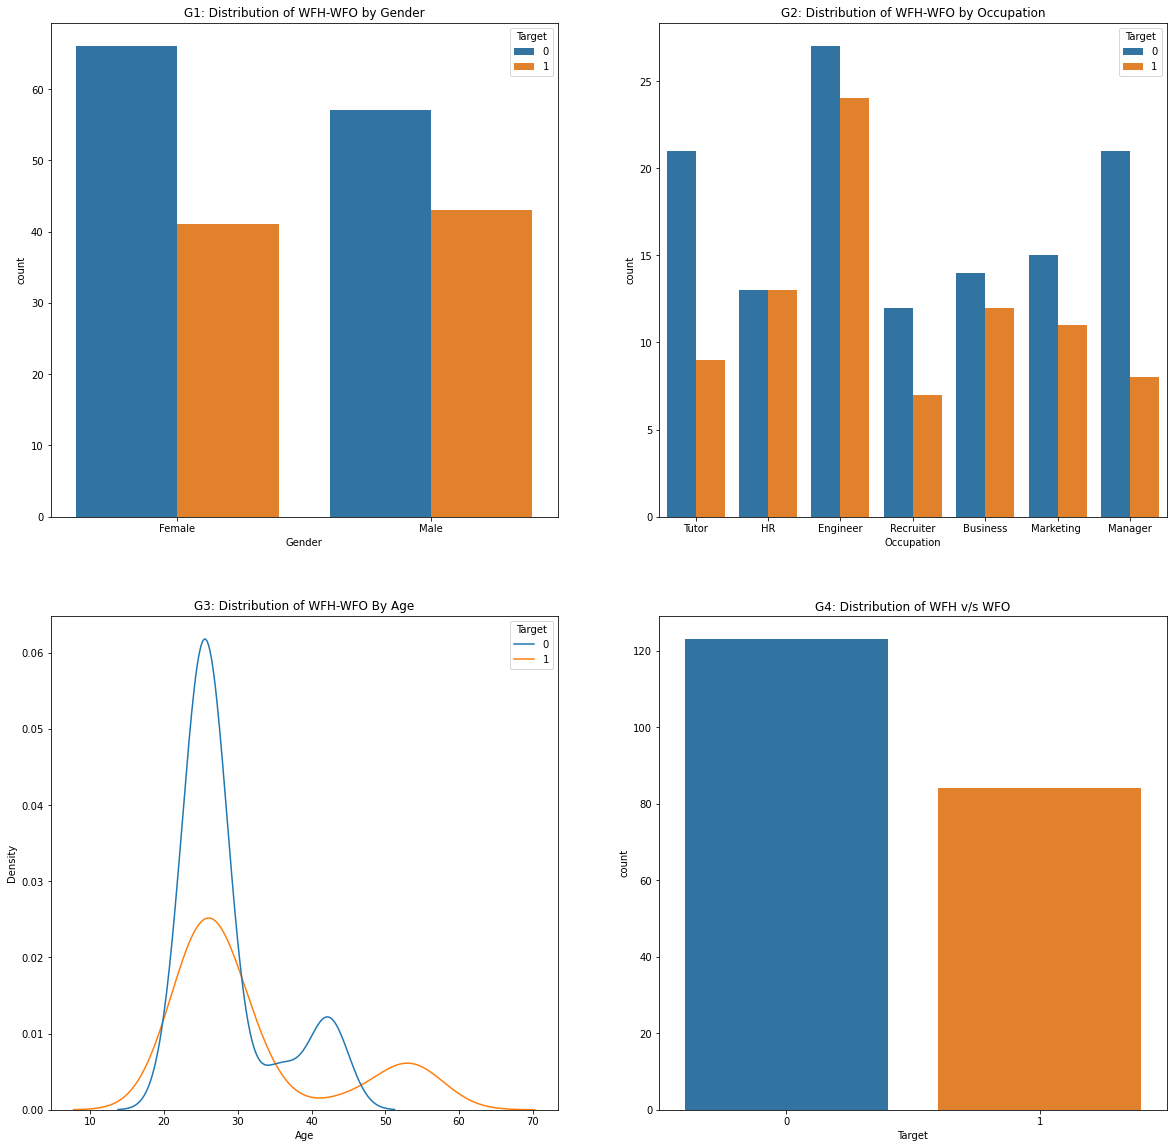

In [8]:
# Plotting Distribution of categorical variables and, continuous feature Age
fig, axs = plt.subplots(2, 2,figsize=(20, 20))
axs[0, 0].set_title("G1: Distribution of WFH-WFO by Gender")
sns.countplot(data=work_labled, x="Gender", hue="Target",ax=axs[0,0])
axs[0, 1].set_title("G2: Distribution of WFH-WFO by Occupation")
sns.countplot(data=work_labled, x="Occupation", hue="Target",ax=axs[0,1])
axs[1, 0].set_title("G3: Distribution of WFH-WFO By Age")
sns.kdeplot(data=work_labled, x="Age", hue="Target",ax=axs[1,0])
axs[1, 1].set_title("G4: Distribution of WFH v/s WFO")
sns.countplot(data=work_labled, x="Target",ax=axs[1,1])

#### Interpretation 

We know that 1 = Work From Home and 0 = Work From Office . I have chosen to observe the behaviour of target with the categorical features available in the dataset. 

* G4 : There is a class imbalance in the data that we need to address in the future, thus it is good to use plots that have hues linked to the target classification so we can compare apples to apples.

* G3: We can observe that most of the people in this data-set are in the age range of 20-30,we have data for people over 40 who prefer working from home which makes sense intuitively because older people might prefer working from home. There is low vairability for WFO section of data in terms of ages where as WFO section seems more spread out.

* G2 and G1 : Gives the distrubtion of target variable across Occuption and Gender respectively. Women prefer working from home more strongly than men in the dataset. Additionally excluding HR there is a higher preference to Working from home among most occupation. The dataset seems to have records for a lot of engineers.

###  Feature Engineering

In [9]:
# Splitting data into Features and Target

X = work_labled[work_labled.columns.difference(['Target','kids','Name','ID','RM_quality_time'])]
y = work_labled.Target


In [10]:
# Encoding Categorical Columns 
X.head()
print(X.shape)

# Using Get Dummies to Encode 3 columns 
X_enc=pd.get_dummies(X[['Gender','Occupation','calmer_stressed']], prefix=['G', 'O','C'],drop_first=True)

# Concatinating it with the main dataframe 

X_e = pd.concat([X,X_enc],axis=1).drop(columns=['Gender','Occupation','calmer_stressed'])
print(X_e.isnull().sum())
X_e.head()


(207, 14)
Age                            0
RM_better_sleep                0
RM_better_work_life_balance    0
RM_improved_skillset           0
RM_job_opportunities           0
RM_lazy                        0
RM_productive                  0
RM_professional_growth         0
RM_save_money                  0
Same_ofiice_home_location      0
digital_connect_sufficient     0
G_Male                         0
O_Engineer                     0
O_HR                           0
O_Manager                      0
O_Marketing                    0
O_Recruiter                    0
O_Tutor                        0
C_STRESSED                     0
dtype: int64


,Age,RM_better_sleep,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,RM_lazy,RM_productive,RM_professional_growth,RM_save_money,Same_ofiice_home_location,digital_connect_sufficient,G_Male,O_Engineer,O_HR,O_Manager,O_Marketing,O_Recruiter,O_Tutor,C_STRESSED
0,45,1,5,5,1,1,5,5,1,1,1,0,0,0,0,0,0,1,0
1,24,0,3,3,-1,2,2,2,0,0,0,1,0,0,0,0,0,1,0
2,53,1,5,3,-1,3,4,3,1,1,0,0,0,1,0,0,0,0,0
3,26,0,4,5,1,4,4,3,1,1,0,0,1,0,0,0,0,0,1
4,26,0,4,2,1,3,5,3,0,1,1,1,0,0,0,0,1,0,1


In [11]:
#Scaling X 

# Using MinMax Scaler because we want to normalize the data to ranges 0 and 1 
sc = MinMaxScaler()

# Peforming Scaling on the required columns 
cols_s = ['Age','RM_save_money', 'RM_professional_growth','RM_lazy', 'RM_productive', 'RM_better_work_life_balance', 'RM_improved_skillset','RM_job_opportunities']
Sc=pd.DataFrame(sc.fit_transform(X_e[cols_s]),columns=cols_s)
Sc.head()

#Appending with X
X_s = X_e.drop(columns=['Age','RM_save_money', 'RM_professional_growth','RM_lazy', 'RM_productive', 'RM_better_work_life_balance', 'RM_improved_skillset','RM_job_opportunities'])
X_s = pd.concat([X_s,Sc],axis=1)
X_s.head()


,RM_better_sleep,Same_ofiice_home_location,digital_connect_sufficient,G_Male,O_Engineer,O_HR,O_Manager,O_Marketing,O_Recruiter,O_Tutor,C_STRESSED,Age,RM_save_money,RM_professional_growth,RM_lazy,RM_productive,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities
0,1,1,1,0,0,0,0,0,0,1,0,0.666667,1.0,1.00,0.00,1.00,1.00,1.00,1.0
1,0,0,0,1,0,0,0,0,0,1,0,0.083333,0.0,0.25,0.25,0.25,0.50,0.50,0.0
2,1,1,0,0,0,1,0,0,0,0,0,0.888889,1.0,0.50,0.50,0.75,1.00,0.50,0.0
3,0,1,0,0,1,0,0,0,0,0,1,0.138889,1.0,0.50,0.75,0.75,0.75,1.00,1.0
4,0,1,1,1,0,0,0,0,1,0,1,0.138889,0.0,0.50,0.50,1.00,0.75,0.25,1.0


#### Segmenting and Resampling

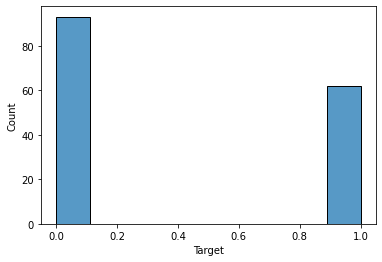

In [12]:
#Segmenting into training and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X_s,y,test_size=0.25,random_state=22)

#Checking Class imbalance
sns.histplot(data=y_train);

#### Action Required
We observe that the data continues to be imbalanced thus we need to resample the data before we apply the models

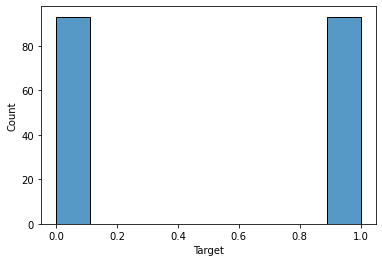

In [13]:
# Resampling using SMOTE to address class imbalance
sm = SMOTE(random_state=27)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train)
sns.histplot(data=y_train_s);

### Model Selection and Validation 

In [14]:
# Model 1 : Gaussian Naive Bayes classifier
#Initialize model
gnb = GaussianNB() 
gnb.fit(X_train_s, y_train_s)
gnb_y_pred  = gnb.predict(X_test)
print(classification_report(y_test, gnb_y_pred , digits=3,target_names=['WFO','WFH']))

print("Accuracy Score for the GNB model: ",metrics.accuracy_score(y_test,gnb_y_pred))

              precision    recall  f1-score   support

         WFO      0.758     0.833     0.794        30
         WFH      0.737     0.636     0.683        22

    accuracy                          0.750        52
   macro avg      0.747     0.735     0.738        52
weighted avg      0.749     0.750     0.747        52

Accuracy Score for the GNB model:  0.75


In [15]:
# Model 2 : KNN
#Initialize model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_s, y_train_s)
knn_y_pred  = knn.predict(X_test)
print(classification_report(y_test, knn_y_pred , digits=3,target_names=['WFO','WFH']))

print("Accuracy Score for the KNN model: ",metrics.accuracy_score(y_test,knn_y_pred))

              precision    recall  f1-score   support

         WFO      1.000     0.833     0.909        30
         WFH      0.815     1.000     0.898        22

    accuracy                          0.904        52
   macro avg      0.907     0.917     0.904        52
weighted avg      0.922     0.904     0.904        52

Accuracy Score for the KNN model:  0.9038461538461539


In [16]:
# Model 3 : Logistic Regression
#Initialize model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_s, y_train_s)
lr_y_pred  = lr.predict(X_test)
print(classification_report(y_test, lr_y_pred , digits=3,target_names=['WFO','WFH']))

print("Accuracy Score for the GNB model: ",metrics.accuracy_score(y_test,gnb_y_pred))

              precision    recall  f1-score   support

         WFO      0.926     0.833     0.877        30
         WFH      0.800     0.909     0.851        22

    accuracy                          0.865        52
   macro avg      0.863     0.871     0.864        52
weighted avg      0.873     0.865     0.866        52

Accuracy Score for the GNB model:  0.75


#### Best Model So Far  : KNN

KNN is giving the best results so far, it has a 100% true positive rate (100% precison) for WFO class and can classify people all the people who have truly preffered WFH correctly (100% Recall)thus displaying a few false positives for WFH and false negatives for WFO. Overall GNB classifies WFO better than WFH based on the f-1 scores. 

GNB is performing the worst based on f1 score and even thought the f1 score for LR is pretty high the results don't match the accuracy of the knn model

#### Tuning

In [17]:
#Defining few hyper-parameters
parameters = {
    'n_neighbors'  : [3,4,5, 6, 7, 8, 9], 'weights' : ['uniform', 'distance']
}

#I GridSeach for the best combination of parameters
tuning = GridSearchCV(knn,                    # model
                      param_grid = parameters,   # hyperparameters
                      scoring='accuracy',        # metric for scoring
                      cv=10)
tuning.fit(X_train_s,y_train_s)

#Analyze results after CV for best accuracy
results = pd.concat([pd.DataFrame(tuning.cv_results_["params"]),pd.DataFrame(tuning.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(results.sort_values(by=['Accuracy']))



    n_neighbors   weights  Accuracy
8             7   uniform  0.813450
4             5   uniform  0.845322
6             6   uniform  0.845322
2             4   uniform  0.856433
12            9   uniform  0.856725
10            8   uniform  0.872222
0             3   uniform  0.935965
11            8  distance  0.973099
13            9  distance  0.978363
5             5  distance  0.978655
7             6  distance  0.978655
9             7  distance  0.978655
1             3  distance  0.989474
3             4  distance  0.989474


In [18]:
knn_t = KNeighborsClassifier(n_neighbors=4,weights='distance')
knn_t.fit(X_train_s,y_train_s)
t_y_pred  = knn_t.predict(X_test)
print(classification_report(y_test, t_y_pred , digits=3,target_names=['WFO','WFH']))

              precision    recall  f1-score   support

         WFO      1.000     1.000     1.000        30
         WFH      1.000     1.000     1.000        22

    accuracy                          1.000        52
   macro avg      1.000     1.000     1.000        52
weighted avg      1.000     1.000     1.000        52



It's unusual to see a model that has a perfect f-1 score. Because the sample size is low this might be over-fitted. I can't conclusively say that this model is better 

### ROC and AUC 

#### Context 
* True Positive Rate : What % of the actually positive values can the model predict. 
* False Positive Rate : % the false positive values compared the actual negative values does the model misclassify
* ROC : Plots the true positive rate (TPR) against the false positive rate (FPR), we can compare for multiple models
* AUC : Metric of comaprsion, represents the area under the curve for the model 
* AUC Benchmark : 0.5 if the classier is random and 1 if it classifies perfectly. 

In [19]:

#Calculating thr Area under the curve for ROC Plot for each model
gnb_auc = roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1])
knn_auc= roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
lr_auc= roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# FPR : False Positve Rate ; TPR : True Positive Rate 
gnb_fpr, gnb_tpr, gnb_threshold = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])

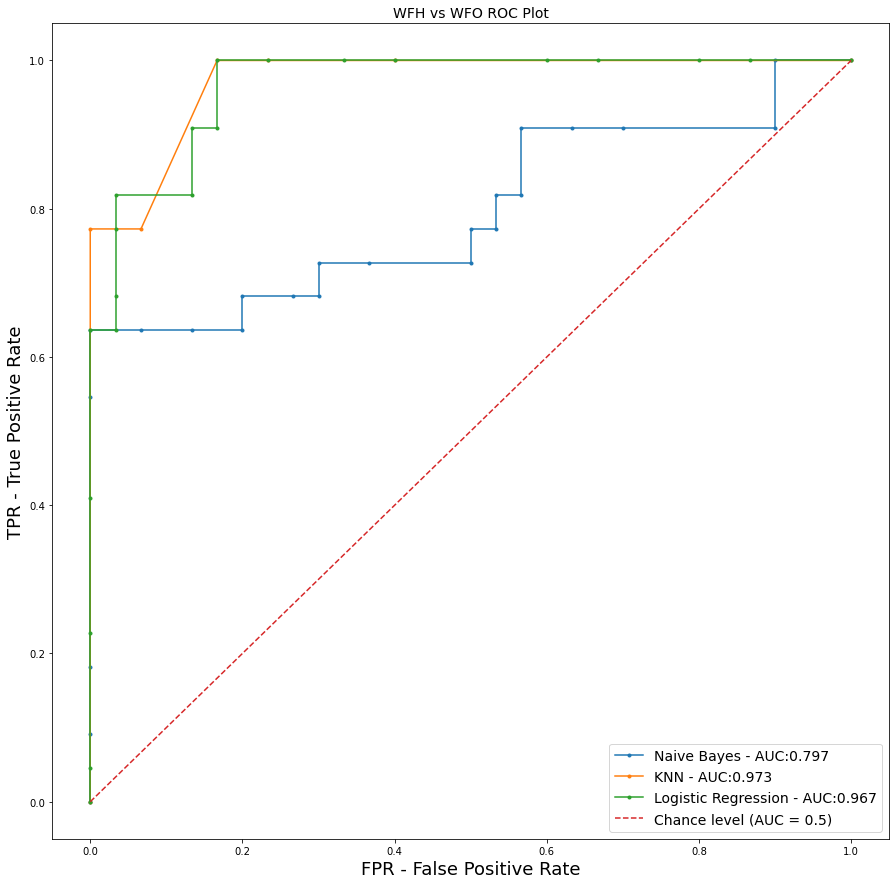

In [20]:
#Plotting the ROC graph to visualize this 
plt.figure(figsize=(15, 15))
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Naive Bayes - AUC:%.3f' % gnb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN - AUC:%.3f' % knn_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression - AUC:%.3f' % lr_auc)
plt.plot([0, 1], [0, 1], "--", label="Chance level (AUC = 0.5)")
plt.xlabel('FPR - False Positive Rate', fontsize=18)
plt.ylabel('TPR - True Positive Rate', fontsize=18)
plt.title('WFH vs WFO ROC Plot' % gnb_auc,  fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.show()

### Final Questions

Based on the AUC values above I have picked the Logistic Regression is the best Classifier 

* Does your classifier have a higher difficulty classifying a particular class? Explain.

Based on the classification report, we can tell that LR has a difficulty classifying WFH more than WFO due to slightly lower f1 score for WFH

* How good is the classification of your final model?

Based on both the classification report, Accuracy score  and AUC score Logistic Regression is a good classifier for the dataset

* Choose a specific performance metric to report to answer the previous question. Justify why this particular metric would be more relevant to this dataset.

Particularrly AUC metric is valuable to this it analyzes the overall perfomance of the model.

### References 

#### Data Cleaning :  
EDA Cheatsheet from last semester 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

#### Plotting Visualization
Lab2_S23_Solutions.html

https://seaborn.pydata.org/generated/seaborn.countplot.html

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

#### Splitting, Visualizing, Scaling 
Lab7_S23_ApoorvaShetty

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

#### Segmenting and ReSampling 

InclassL14_Class_imbalances_Answers.html

#### Modeling 

InclassL14_Class_imbalances_Answers.html

Lab6_S23_Solutions.html

Lab5_S23_Solutions.html

Lab7_S23_ApoorvaShetty

#### Tuning 

InclassL12Ex_Classification_Answers.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

#### ROC AUC 

Lab6_S23_Solutions.html